# Netflix Exploratory Data Analysis

This notebook, I'll give EDA from **Netflix Data Set** from **kaggle**

--**STEPS**--
1. Basic Data Exploration
   1. Import Packages and Load Data
   2. Feature Exploration
   3. Summary Statistics
2. Data Cleaning
   1. Null Value Analysis
   2. Outlier Analysis
3. ML -Encoding-
   1. Label Encoding
   2. One-Hot-Encoder Encoding
4. Exploratory data analysis (Answering questions we have of the data) 
   1. Close look at the data in the dataset (with agg)

## Basic Data Exploration
1. Import Packages and load Data
2. Feature Exploration
3. Summary Statistics

#### Importing Libraries and Loading the Dataset

In [1]:
# Import Relevant Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
# Set some Options
# ensure that all columns will be displayed in their entirety when printing a DataFrame.
pd.set_option("display.max_columns", None)
# set the display width to 500 characters
pd.set_option("display.width", 500)

In [3]:
# Load Data set
df = pd.read_csv('data_sets/netflix_titles.csv')

#### Feature Exploration

In [4]:
# First 3 Data
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], dtype='object')

In [6]:
df.shape

(8807, 12)

In [7]:
# Data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We Have:
* 11 Categorical Feature
* 1 Numeric Feature

#### Summary Statistics

In [8]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
# We have only 'release_year' as a numeric feature
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [9]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Data Cleaning
1. Null Value Analysis
2. Outlier Analysis

#### Null Value Analysis

In [10]:
# Is there any null value in dataset
df.isnull().values.any()

True

<Axes: >

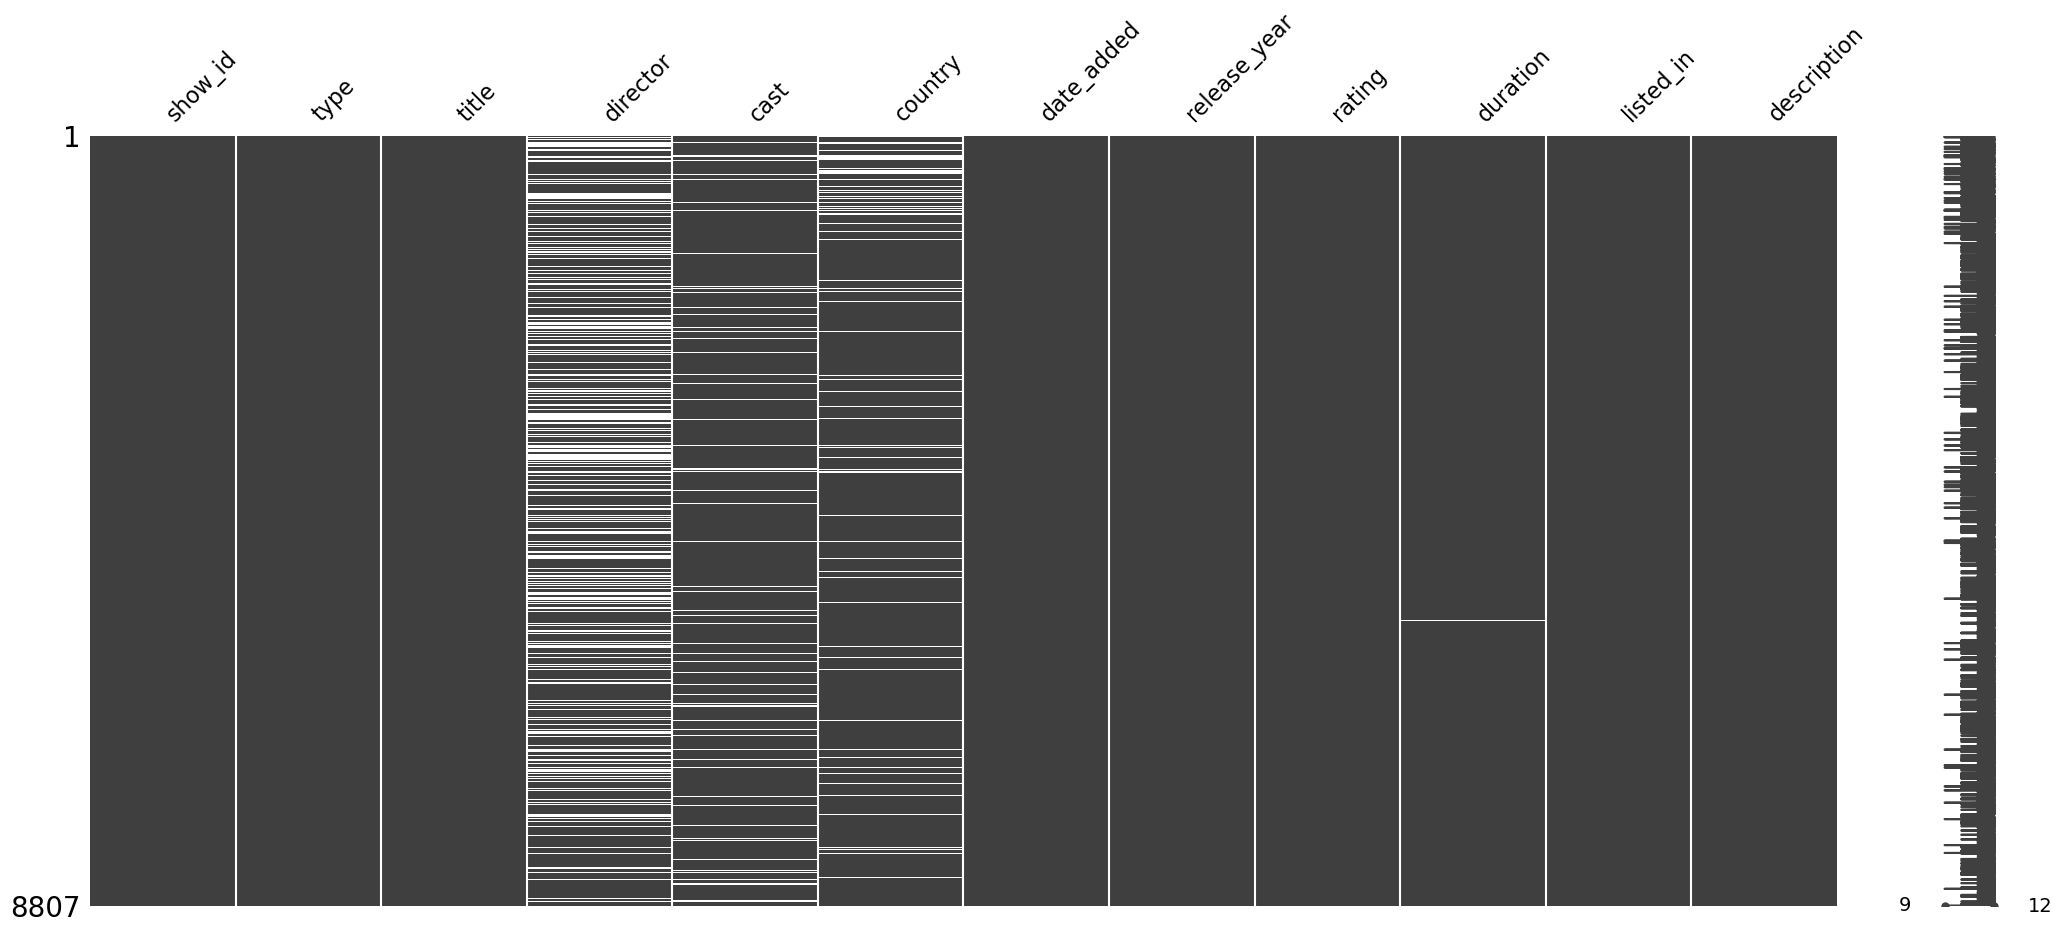

In [11]:
# Which features have how much null values?
msno.matrix(df)

In [12]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]
    
    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns
    

missing_value_table(df)

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


* Six features have null values and all of them is ***categorical feature***

In [13]:
# Turn null values to 'missing'
columns_to_fill = missing_value_table(df, get_null_columns=True)
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In [14]:
# Is there any null value in dataset
df.isnull().sum().any()

False

#### Outlier Analysis

1. For Numeric Features

In [15]:
[col for col in df.columns if df[col].dtype in ['int64', 'float64']]

['release_year']

<Axes: xlabel='release_year'>

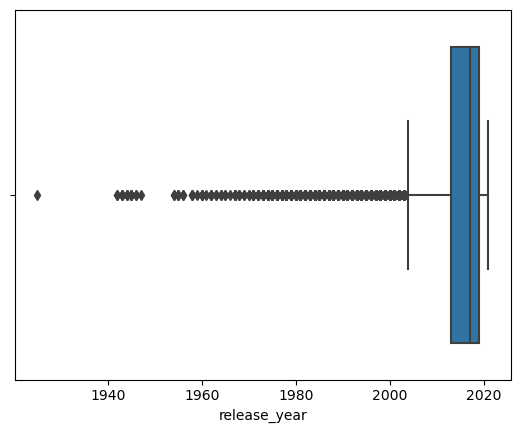

In [16]:
# Boxplot in 'release_year'
sns.boxplot(x=df["release_year"])

We have only one numeric feature 'release_year' and We don't need to eliminate any outliers in this dataset, because we need every content in every year

2. For Categorical Features

In [17]:
df.select_dtypes(include=['object']).columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']

In [18]:
def plot_categorical_frequency(data, x_label, y_label, title):
    """Show Bar Frequency for categorical Features"""
    frequency_counts = data.value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_counts.index, frequency_counts.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45) 
    plt.show()

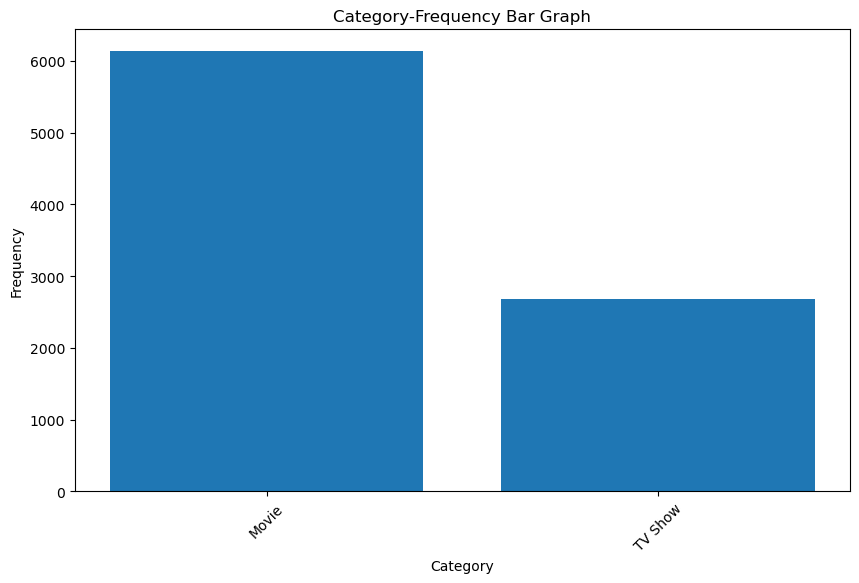

In [19]:
# 'type' Feature
plot_categorical_frequency(df["type"], "Category", "Frequency", "Category-Frequency Bar Graph")

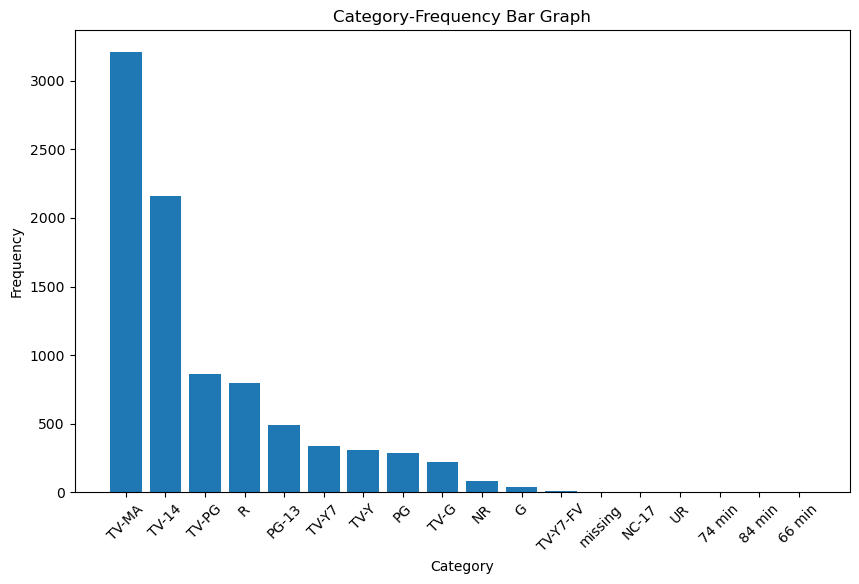

In [20]:
# 'rating' Feature
plot_categorical_frequency(df["rating"], "Category", "Frequency", "Category-Frequency Bar Graph")

with 'rating' frequency analysis we see three unwanted values entered: '74 min', '84 min', '66 min'
* We can eliminate these with turning values to 'UR'; Because UR means, Unrated

In [21]:
# Change '74 min', '84 min', '66 min' Values to 'UR'
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min']), 'UR', df['rating'])

For Other Categorical Features we don't need to do Outlier analysis; because unique value count higher than 200

## Encoding
1. Label Encoding
2. One-Hot-Encoding

* Which Features needs Label Encoding

In [22]:
[col for col in df.columns if df[col].dtype not in ["int", "float"] and df[col].nunique() == 2]

['type']

In [23]:
df["type"].value_counts() 

Movie      6131
TV Show    2676
Name: type, dtype: int64

* We can only label encode 'type' feature; because other categorical features have value_counts higher then 200

In [24]:
def label_encoder(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
    return df, le.classes_

In [25]:
# 0 -- Movie
# 1 -- Tv-Shows
label_encoder(df, "type")

(     show_id  type                  title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description
 0         s1     0   Dick Johnson Is Dead  Kirsten Johnson                                            missing  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...
 1         s2     1          Blood & Water          missing  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...
 2         s3     1              Ganglands  Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        missing  September 24, 2021          2021 

2. One-Hot-Encoder Encoding

* Which Features needs One-Hot-Encoder

In [26]:
# Which features needs to be use with one-hot-encoder
[col for col in df.columns if df[col].nunique()>2 and df[col].nunique()<10]

[]

We don't need to use one-hot-encoder

## EDA

#### Close look at the data in the dataset

In [27]:
# Movie and Tv Shows Data Examination
# count and release_year
df.groupby("type").agg({
    "show_id": "count",     
    "release_year": ["min", "max", "mean"],
})

show_id release_year                   
       count          min   max         mean
type                                        
0       6131         1942  2021  2013.121514
1       2676         1925  2021  2016.605755

In [28]:
# Genre count
df.groupby("listed_in").agg({
    "show_id": "count",     
}).sort_values(by="show_id", ascending=False)

,show_id
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Cult Movies, Dramas, International Movies",1
"Cult Movies, Dramas, Music & Musicals",1
"Cult Movies, Dramas, Thrillers",1


In [29]:
# Content numbers from country in Netflix,
df.groupby("country").agg({
    "show_id": "count"
}).sort_values(by="show_id", ascending=False)

,show_id
country,
United States,2818
India,972
missing,831
United Kingdom,419
Japan,245
...,...
"Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India",1
"Ireland, Canada, United Kingdom, United States",1
"Ireland, Canada, United States, United Kingdom",1


In [30]:
# Rating Counts
df.groupby("rating").agg({
    "show_id": "count"
})

,show_id
rating,
G,41
NC-17,3
NR,80
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207
